In [1]:
#Import functions------------------------------------------------------------------------------------------------------
from my_functions import*
#Open Zmumu file
file= uproot.open("/home/ruben/Escritorio/BachelorThesisRuben/Data/Muon_trees.root") 
MuonTree_Zmumu=file["MuonTree_Zmumu;1"]

#Set event range
nmin1=0
nmax1=3000

#Choose quality 0
Zmumu_pt=quality_selector_with_empty(MuonTree_Zmumu["muon_quality"].array(),MuonTree_Zmumu["muon_pt"].array(),0)[nmin1:nmax1]
Zmumu_eta=quality_selector_with_empty(MuonTree_Zmumu["muon_quality"].array(),MuonTree_Zmumu["muon_eta"].array(),0)[nmin1:nmax1]
Zmumu_phi=quality_selector_with_empty(MuonTree_Zmumu["muon_quality"].array(),MuonTree_Zmumu["muon_phi"].array(),0)[nmin1:nmax1]
#Select the Z peak pairs
Zmumu_pt, Zmumu_eta, Zmumu_phi= get_all_Z_peak_pairs(Zmumu_pt,Zmumu_eta,Zmumu_phi)

#Open ZeroBias file
file= uproot.open("/home/ruben/Escritorio/BachelorThesisRuben/Data/zbV3_skim.root") 
MuonTree_ZeroBias=file["MuonTree;1"]

#Apply energy cut to offline
ZeroBias_pt=energy_cut_with_empty(MuonTree_ZeroBias["muon_pt"].array(), MuonTree_ZeroBias["muon_pt"].array())
ZeroBias_eta=energy_cut_with_empty(MuonTree_ZeroBias["muon_pt"].array(), MuonTree_ZeroBias["muon_eta"].array())
ZeroBias_phi=energy_cut_with_empty(MuonTree_ZeroBias["muon_pt"].array(), MuonTree_ZeroBias["muon_phi"].array())

#Get online data
Zbl1_pt=MuonTree_ZeroBias["LVL1Muon_et"].array() * 1000
Zbl1_eta=MuonTree_ZeroBias["LVL1Muon_eta"].array()
Zbl1_phi=MuonTree_ZeroBias["LVL1Muon_phi"].array()

#Create mask matching offline and LVL1
mask=offline_LVL1_matcher(ZeroBias_eta, ZeroBias_phi, Zbl1_eta, Zbl1_phi)

#Apply mask
ZeroBias_pt=ZeroBias_pt[mask]
ZeroBias_eta=ZeroBias_eta[mask]
ZeroBias_phi=ZeroBias_phi[mask]

#
cone20=energy_cut_with_empty(MuonTree_ZeroBias["muon_pt"].array(), MuonTree_ZeroBias["muon_topoEtCone20"].array()) 
cone30=energy_cut_with_empty(MuonTree_ZeroBias["muon_pt"].array(), MuonTree_ZeroBias["muon_topoEtCone30"].array()) 
cone40=energy_cut_with_empty(MuonTree_ZeroBias["muon_pt"].array(), MuonTree_ZeroBias["muon_topoEtCone40"].array()) 


cone20=cone20[mask]
cone30=cone30[mask]
cone40=cone40[mask]

100%|██████████| 3000/3000 [00:04<00:00, 691.88it/s]
494957it [02:18, 3574.61it/s]


In [2]:

l1=len(ak.flatten(cone20))
l2=len(ak.flatten(cone30))
l3=len(ak.flatten(cone40))

dr_min=0.1
dr_max=0.2
scaling=1.0
res1=muon_isolation_all_events(MuonTree_ZeroBias, ZeroBias_eta, ZeroBias_phi, dr_min, dr_max, 
                            event_range=[0, len(ZeroBias_eta)], scaling=scaling)

l4=len(ak.flatten(res1))


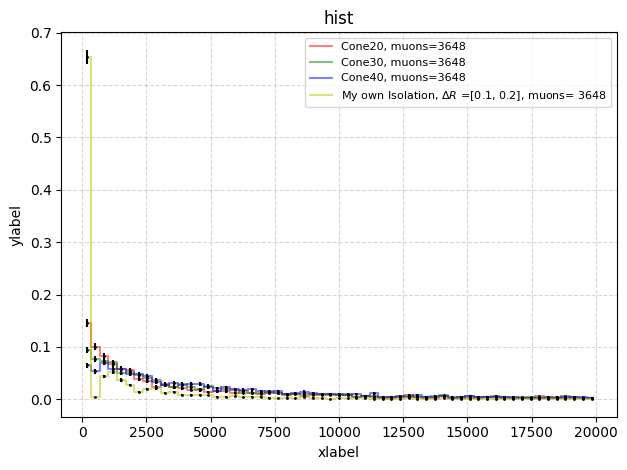

In [3]:

bins=np.linspace(0, 20000, 60)
coolplot([cone20, cone30, cone40, res1], bins, 
         labels=[f"Cone20, muons={l1}", f"Cone30, muons={l2}",
                  f"Cone40, muons={l3}", rf"My own Isolation, $\Delta R$ =[{dr_min}, {dr_max}], muons= {l4}"]
                  , colors=['r', 'g', 'b', 'y'], plot_show=False, collect_overflow=False)
plt.savefig('hist_cone_vs_my_iso.pdf', format='pdf')
plt.show()

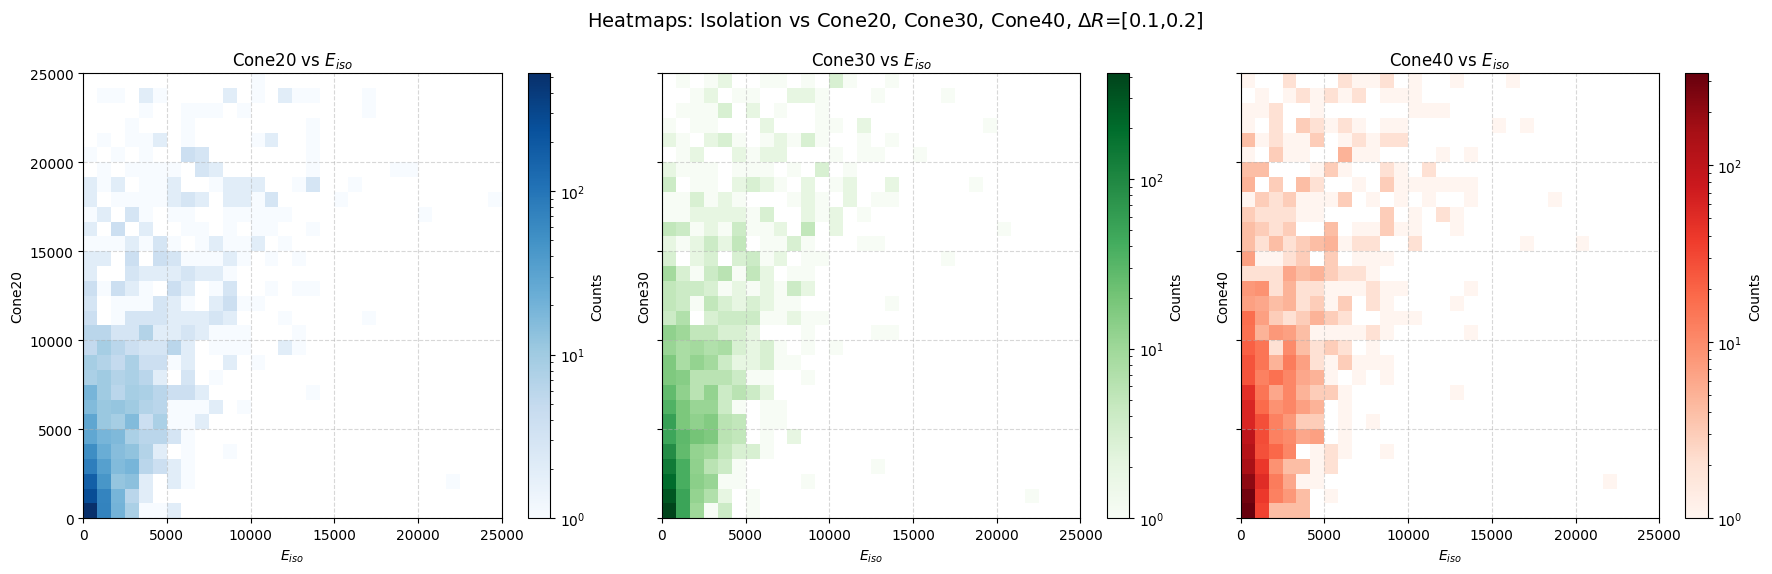

In [4]:
# Convert Awkward arrays to NumPy arrays
cone20_np=ak.flatten(cone20).to_numpy()
cone30_np=ak.flatten(cone30).to_numpy()
cone40_np=ak.flatten(cone40).to_numpy()


res1_np = ak.flatten(res1).to_numpy()

# Set up the figure and axes (1 row, 3 columns)
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

bins = 30
lim=25000
# Plot for cone20 vs res1 (Swapped axes)
h1 = axs[0].hist2d(res1_np, cone20_np, bins=bins, range=[[0, lim], [0, lim]],
                   cmap="Blues", norm=plt.cm.colors.LogNorm())
axs[0].set_xlim(0, lim)
axs[0].set_ylim(0, lim)
axs[0].set_xlabel(r'$E_{iso}$')
axs[0].set_ylabel(r'Cone20')
axs[0].grid(alpha=0.5, linestyle="--")
fig.colorbar(h1[3], ax=axs[0], label='Counts')
axs[0].set_title('Cone20 vs $E_{iso}$')

# Plot for cone30 vs res1 (Swapped axes)
h2 = axs[1].hist2d(res1_np, cone30_np, bins=bins, range=[[0, lim], [0, lim]],
                   cmap="Greens", norm=plt.cm.colors.LogNorm())
axs[1].set_xlim(0, lim)
axs[1].set_ylim(0, lim)
axs[1].set_xlabel(r'$E_{iso}$')
axs[1].set_ylabel(r'Cone30')
axs[1].grid(alpha=0.5, linestyle="--")
fig.colorbar(h2[3], ax=axs[1], label='Counts')
axs[1].set_title('Cone30 vs $E_{iso}$')

# Plot for cone40 vs res1 (Swapped axes)
h3 = axs[2].hist2d(res1_np, cone40_np, bins=bins, range=[[0, lim], [0, lim]],
                   cmap="Reds", norm=plt.cm.colors.LogNorm())
axs[2].set_xlim(0, lim)
axs[2].set_ylim(0, lim)
axs[2].set_xlabel(r'$E_{iso}$')
axs[2].set_ylabel(r'Cone40')
axs[2].grid(alpha=0.5, linestyle="--")
fig.colorbar(h3[3], ax=axs[2], label='Counts')
axs[2].set_title('Cone40 vs $E_{iso}$')

# Adjust the layout and title
fig.suptitle(rf"Heatmaps: Isolation vs Cone20, Cone30, Cone40, $\Delta R$=[{dr_min},{dr_max}]", fontsize=14)
plt.tight_layout(rect=[0, 0.03, 1, 1])

# Save and show the figure
plt.savefig(f'heatmap_cone_dr_min_{dr_min}_dr_max_{dr_max}_scaling_{scaling}.pdf', format='pdf')
plt.show()


In [5]:
from my_functions import*
file= uproot.open("/home/ruben/Escritorio/BachelorThesisRuben/Data/zbV3_skim.root") 
MuonTree_ZeroBias=file["MuonTree;1"]

In [38]:

l1=len(ak.flatten(cone20))
l2=len(ak.flatten(cone30))
l3=len(ak.flatten(cone40))

dr_min=0.0
dr_max=0.4
scaling=1.0
res1=muon_isolation_all_events(MuonTree_ZeroBias, ZeroBias_eta, ZeroBias_phi, dr_min, dr_max, 
                            event_range=[0, len(ZeroBias_eta)], scaling=scaling)

l4=len(ak.flatten(res1))


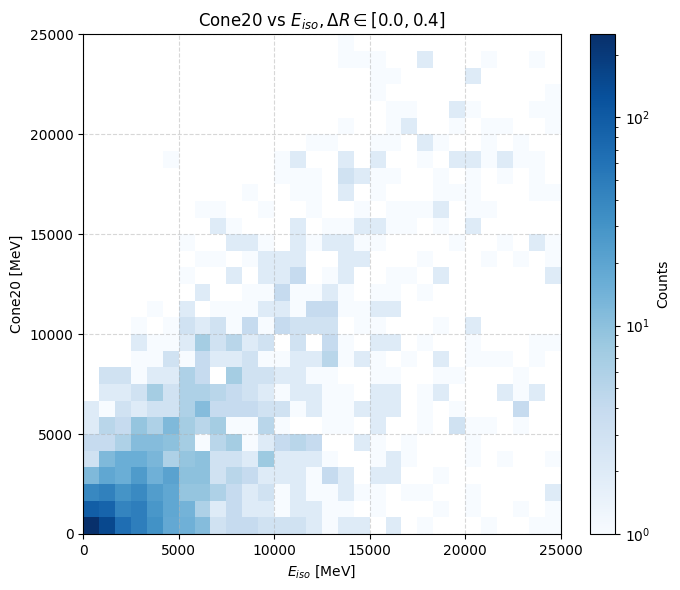

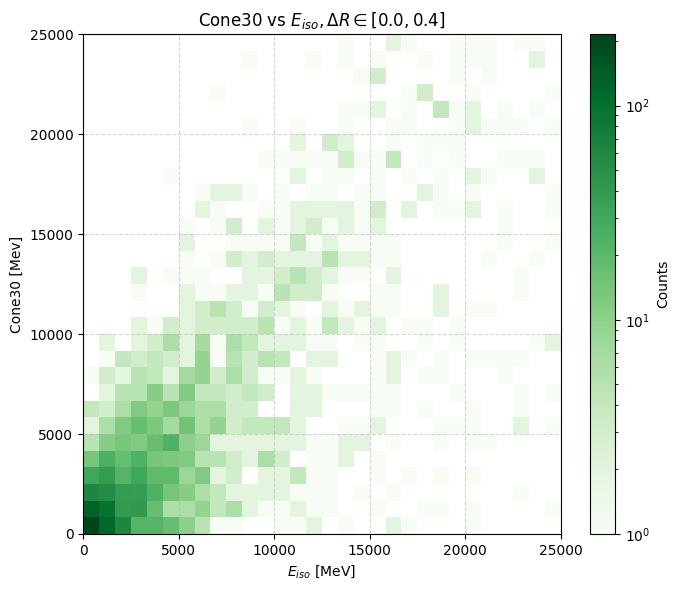

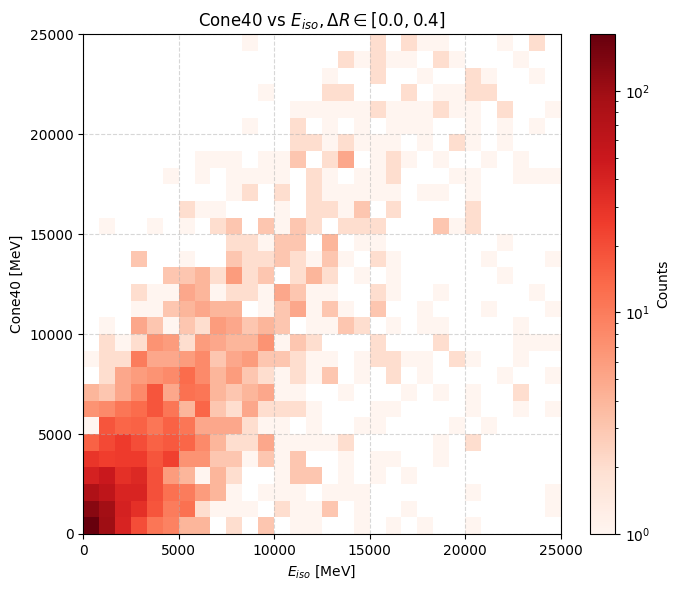

In [39]:
import matplotlib.pyplot as plt
import awkward as ak
import numpy as np

# Convert Awkward arrays to NumPy arrays
cone20_np = ak.flatten(cone20).to_numpy()
cone30_np = ak.flatten(cone30).to_numpy()
cone40_np = ak.flatten(cone40).to_numpy()
res1_np = ak.flatten(res1).to_numpy()

bins = 30
lim = 25000

# First Figure: Cone20 vs E_iso
fig1, ax1 = plt.subplots(figsize=(7, 6))
h1 = ax1.hist2d(res1_np, cone20_np, bins=bins, range=[[0, lim], [0, lim]],
                cmap="Blues", norm=plt.cm.colors.LogNorm())
ax1.set_xlim(0, lim)
ax1.set_ylim(0, lim)
ax1.set_xlabel(r'$E_{iso}$ [MeV]')
ax1.set_ylabel(r'Cone20 [MeV]')
ax1.grid(alpha=0.5, linestyle="--")
fig1.colorbar(h1[3], ax=ax1, label='Counts')
ax1.set_title(rf'Cone20 vs $E_{{iso}}, \Delta R\in[{dr_min},{dr_max}]$')
fig1.tight_layout()
fig1.savefig(f'heatmap_cone20_dr_min_{dr_min}_dr_max_{dr_max}_scaling_{scaling}.pdf')
plt.show()

# Second Figure: Cone30 vs E_iso
fig2, ax2 = plt.subplots(figsize=(7, 6))
h2 = ax2.hist2d(res1_np, cone30_np, bins=bins, range=[[0, lim], [0, lim]],
                cmap="Greens", norm=plt.cm.colors.LogNorm())
ax2.set_xlim(0, lim)
ax2.set_ylim(0, lim)
ax2.set_xlabel(r'$E_{iso}$ [MeV]')
ax2.set_ylabel(r'Cone30 [Mev]')
ax2.grid(alpha=0.5, linestyle="--")
fig2.colorbar(h2[3], ax=ax2, label='Counts')
ax2.set_title(rf'Cone30 vs $E_{{iso}}, \Delta R\in[{dr_min},{dr_max}]$')
fig2.tight_layout()
fig2.savefig(f'heatmap_cone30_dr_min_{dr_min}_dr_max_{dr_max}_scaling_{scaling}.pdf')
plt.show()

# Third Figure: Cone40 vs E_iso
fig3, ax3 = plt.subplots(figsize=(7, 6))
h3 = ax3.hist2d(res1_np, cone40_np, bins=bins, range=[[0, lim], [0, lim]],
                cmap="Reds", norm=plt.cm.colors.LogNorm())
ax3.set_xlim(0, lim)
ax3.set_ylim(0, lim)
ax3.set_xlabel(r'$E_{iso}$ [MeV]')
ax3.set_ylabel(r'Cone40 [MeV]')
ax3.grid(alpha=0.5, linestyle="--")
fig3.colorbar(h3[3], ax=ax3, label='Counts')
ax3.set_title(rf'Cone40 vs $E_{{iso}}, \Delta R\in[{dr_min},{dr_max}]$')
fig3.tight_layout()
fig3.savefig(f'heatmap_cone40_dr_min_{dr_min}_dr_max_{dr_max}_scaling_{scaling}.pdf')
plt.show()
